In [1]:
from imp import reload
import glob
import os

import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

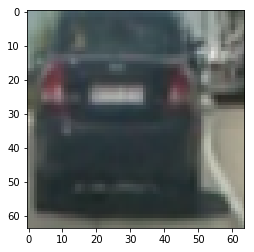

In [2]:
# example vehicle images
i = 3
img_list = glob.glob(os.path.join('data', 'vehicles', 'GTI_MiddleClose', '*.png'))
img = mpimg.imread(img_list[i])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
ax.imshow(img)
plt.show()

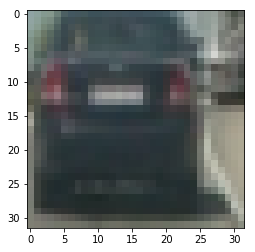

In [4]:
i = 3
img_list = glob.glob(os.path.join('data', 'vehicles', 'GTI_MiddleClose', '*.png'))
img = cv2.cvtColor(cv2.imread(img_list[i]), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
ax.imshow(img)
plt.show()

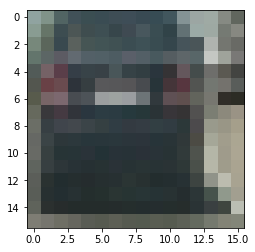

In [5]:
i = 3
img_list = glob.glob(os.path.join('data', 'vehicles', 'GTI_MiddleClose', '*.png'))
img = cv2.cvtColor(cv2.imread(img_list[i]), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (16, 16))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
ax.imshow(img)
plt.show()

### Dataset Creation

In [17]:
img_files_vehicle = glob.glob(os.path.join('./data', 'vehicles', '*', '*.png'))
img_files_nonvehicle = glob.glob(os.path.join('./data', 'non-vehicles', '*', '*.png'))
print('vehicle = {} samples'.format(len(img_files_vehicle)))
print('non-vehicle = {} samples'.format(len(img_files_nonvehicle)))

vehicle = 8792 samples
non-vehicle = 8968 samples


In [18]:
img_vehicles = []
for img_file in img_files_vehicle:
    img_vehicles.append(cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB))
    
img_nonvehicles = []
for img_file in img_files_nonvehicle:
    img_nonvehicles.append(cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB))

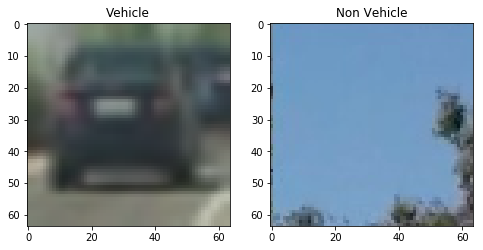

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax1.imshow(img_vehicles[0])
ax1.set_title('Vehicle')
ax2.imshow(img_nonvehicles[0])
ax2.set_title('Non Vehicle')
plt.savefig(os.path.join('output_images', 'vehicle_vs_nonvehicle.jpg'))
plt.show()

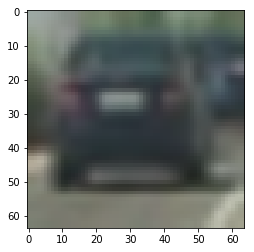

In [27]:
img = cv2.cvtColor(cv2.imread(img_files_vehicle[0]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [38]:
from skimage.feature import hog

img = cv2.cvtColor(cv2.imread(img_files_vehicle[0]), cv2.COLOR_BGR2YCR_CB)

orient = 9
pix_per_cell = 8
cell_per_block = 2

hog_images = []
channels = [0, 1, 2]
for i, channel in enumerate(channels):
    features, hog_image = hog(
        img[:, :, i], 
        orientations=orient,
        pixels_per_cell=(pix_per_cell, pix_per_cell),
        cells_per_block=(cell_per_block, cell_per_block),
        transform_sqrt=False,
        visualise=True, feature_vector=False)
    hog_images.append(hog_image)

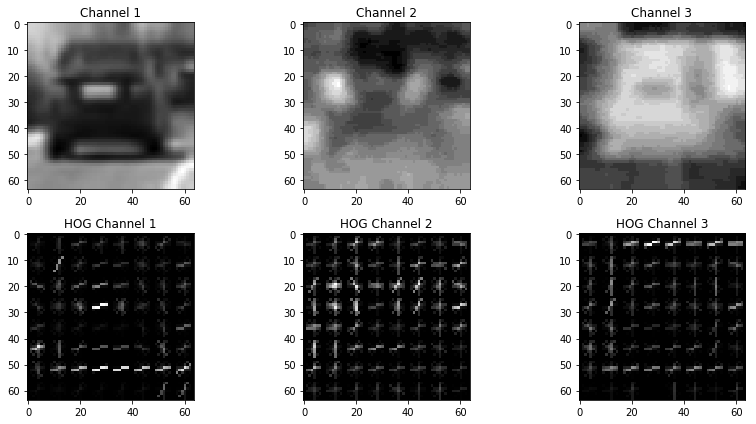

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes[0][0].imshow(img[:, :, 0], cmap='gray')
axes[0][0].set_title('Channel 1')
axes[0][1].imshow(img[:, :, 1], cmap='gray')
axes[0][1].set_title('Channel 2')
axes[0][2].imshow(img[:, :, 2], cmap='gray')
axes[0][2].set_title('Channel 3')
axes[1][0].imshow(hog_images[0], cmap='gray')
axes[1][0].set_title('HOG Channel 1')
axes[1][1].imshow(hog_images[1], cmap='gray')
axes[1][1].set_title('HOG Channel 2')
axes[1][2].imshow(hog_images[2], cmap='gray')
axes[1][2].set_title('HOG Channel 3')
plt.tight_layout()
plt.show()

In [41]:
from skimage.feature import hog

img = cv2.cvtColor(cv2.imread(img_files_nonvehicle[0]), cv2.COLOR_BGR2YCR_CB)

orient = 9
pix_per_cell = 8
cell_per_block = 2

hog_images = []
channels = [0, 1, 2]
for i, channel in enumerate(channels):
    features, hog_image = hog(
        img[:, :, i], 
        orientations=orient,
        pixels_per_cell=(pix_per_cell, pix_per_cell),
        cells_per_block=(cell_per_block, cell_per_block),
        transform_sqrt=False,
        visualise=True, feature_vector=False)
    hog_images.append(hog_image)

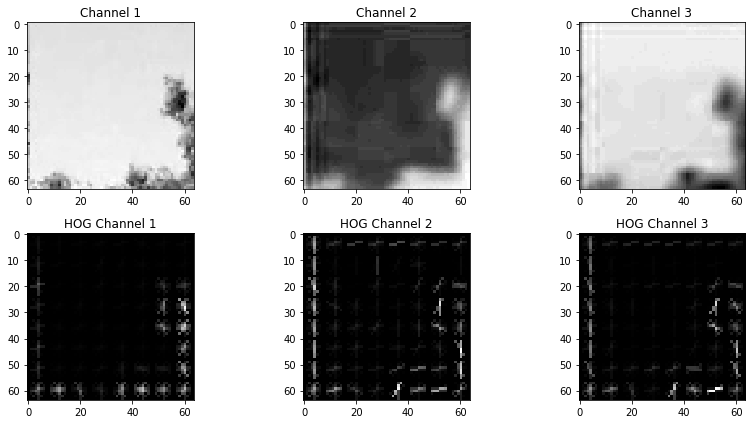

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes[0][0].imshow(img[:, :, 0], cmap='gray')
axes[0][0].set_title('Channel 1')
axes[0][1].imshow(img[:, :, 1], cmap='gray')
axes[0][1].set_title('Channel 2')
axes[0][2].imshow(img[:, :, 2], cmap='gray')
axes[0][2].set_title('Channel 3')
axes[1][0].imshow(hog_images[0], cmap='gray')
axes[1][0].set_title('HOG Channel 1')
axes[1][1].imshow(hog_images[1], cmap='gray')
axes[1][1].set_title('HOG Channel 2')
axes[1][2].imshow(hog_images[2], cmap='gray')
axes[1][2].set_title('HOG Channel 3')
plt.tight_layout()
plt.show()